In [1]:
import warnings
warnings.filterwarnings('ignore')

#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

train=pd.read_csv('trainLoanDH.csv')


In [2]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
print(train.shape)

(614, 13)


In [4]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
train=train.drop(columns=['Loan_ID'],axis=1)
train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
train['CoapplicantIncome']=train['CoapplicantIncome'].replace(0,np.NaN)

In [8]:
train.isnull().sum()

Gender                13
Married                3
Dependents            15
Education              0
Self_Employed         32
ApplicantIncome        0
CoapplicantIncome    273
LoanAmount            22
Loan_Amount_Term      14
Credit_History        50
Property_Area          0
Loan_Status            0
dtype: int64

In [9]:
# fillin the LOAN_AMOUNT_TERM missing va by his mean
m1=train['Loan_Amount_Term'].mean()
train['Loan_Amount_Term']=train['Loan_Amount_Term'].fillna(m1)

In [10]:
# fillin the LOANAMOUNT missing va by his mean
m2=train['LoanAmount'].mean()
train['LoanAmount']=train['LoanAmount'].fillna(m2)

In [11]:
# fillin the Credit_History missing va by his mean
m3=train['Credit_History'].mean()
train['Credit_History']=train['Credit_History'].fillna(m3)

In [12]:
m4=train['CoapplicantIncome'].mean()
train['CoapplicantIncome']=train['CoapplicantIncome'].fillna(m4)

In [13]:
train.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

Y    422
N    192
Name: Loan_Status, dtype: int64


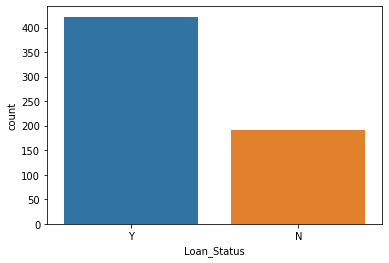

In [14]:
# DATA EXPLORATION

print(train['Loan_Status'].value_counts())
sb.countplot(train.Loan_Status)

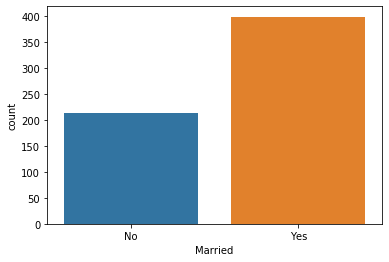

In [15]:
sb.countplot(train.Married)

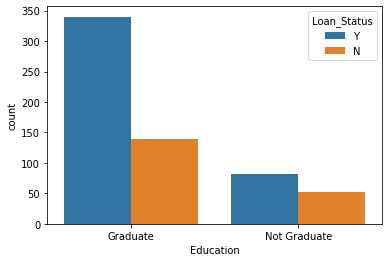

In [16]:
sb.countplot(train.Education,hue='Loan_Status',data=train)

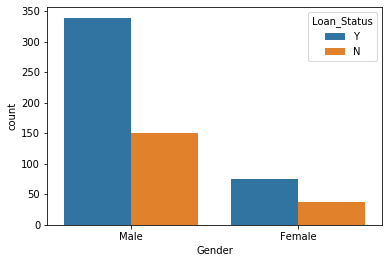

In [17]:
sb.countplot(train.Gender,hue='Loan_Status',data=train)

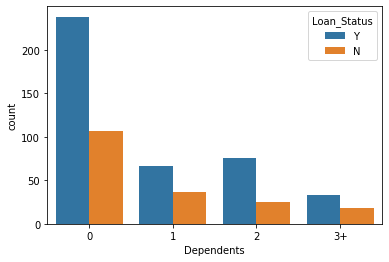

In [18]:
sb.countplot(train.Dependents,hue='Loan_Status',data=train)
# dependents like children

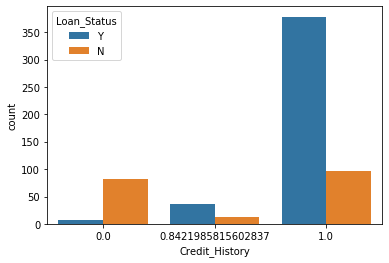

In [19]:
sb.countplot(train.Credit_History,hue='Loan_Status',data=train)

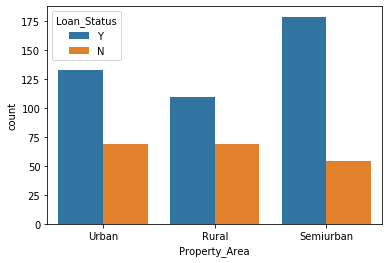

In [20]:
sb.countplot(train.Property_Area,hue='Loan_Status',data=train)

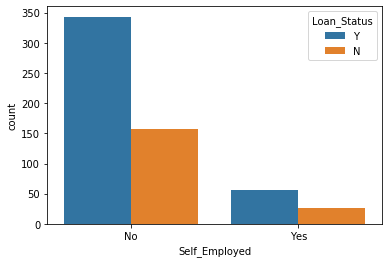

In [21]:
sb.countplot(train.Self_Employed,hue='Loan_Status',data=train)

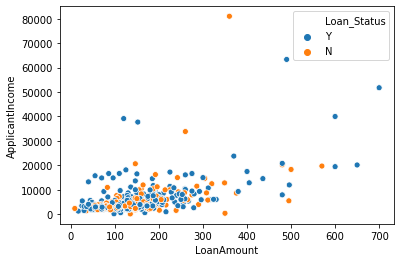

In [22]:
sb.scatterplot(train.LoanAmount,train.ApplicantIncome,hue='Loan_Status',data=train)

In [23]:
# # Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
train['Loan_Status']= labelencoder_X.fit_transform(train['Loan_Status'])


In [24]:
car_var=train.select_dtypes(include=['object']).columns


In [25]:
dummy_var = pd.get_dummies(train[car_var])
# train['Loan_Amount_Term'].value_counts()

In [26]:
train=pd.concat([dummy_var, train], axis=1)
train=train.drop(columns=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Property_Area',],axis=1)


In [27]:
train.head(10)

,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,...,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,0,1,1,0,1,0,0,0,1,0,...,0,0,0,1,5849,2919.193314,146.412162,360.0,1.0,1
1,0,1,0,1,0,1,0,0,1,0,...,0,1,0,0,4583,1508.000000,128.000000,360.0,1.0,0
2,0,1,0,1,1,0,0,0,1,0,...,1,0,0,1,3000,2919.193314,66.000000,360.0,1.0,1
3,0,1,0,1,1,0,0,0,0,1,...,0,0,0,1,2583,2358.000000,120.000000,360.0,1.0,1
4,0,1,1,0,1,0,0,0,1,0,...,0,0,0,1,6000,2919.193314,141.000000,360.0,1.0,1
5,0,1,0,1,0,0,1,0,1,0,...,1,0,0,1,5417,4196.000000,267.000000,360.0,1.0,1
6,0,1,0,1,1,0,0,0,0,1,...,0,0,0,1,2333,1516.000000,95.000000,360.0,1.0,1
7,0,1,0,1,0,0,0,1,1,0,...,0,0,1,0,3036,2504.000000,158.000000,360.0,0.0,0
8,0,1,0,1,0,0,1,0,1,0,...,0,0,0,1,4006,1526.000000,168.000000,360.0,1.0,1
9,0,1,0,1,0,1,0,0,1,0,...,0,0,1,0,12841,10968.000000,349.000000,360.0,1.0,0


In [28]:
train.columns

Index(['Gender_Female', 'Gender_Male', 'Married_No', 'Married_Yes',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Graduate', 'Education_Not Graduate', 'Self_Employed_No',
       'Self_Employed_Yes', 'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban', 'ApplicantIncome', 'CoapplicantIncome',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Loan_Status'],
      dtype='object')

In [29]:
X = train.loc[:,train.columns!='Loan_Status']
Y = train.loc[:,train.columns=='Loan_Status']

In [31]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.25, random_state = 0)

In [32]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [33]:
#regression model fitting
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)

# from sklearn.ensemble import RandomForestClassifier
# classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print('Accuracy of random forest classifier on test set: {:.2f}'.format(classifier.score(X_test, y_test)*100))

Accuracy of random forest classifier on test set: 83.12


In [34]:
# feature extraction USING BACKWARD ELIMINATION using a probability treshode of 0.5
col=['Gender_Female', 'Gender_Male', 'Married_No', 'Married_Yes',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Graduate', 'Education_Not Graduate', 'Self_Employed_No',
       'Self_Employed_Yes', 'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban', 'ApplicantIncome', 'CoapplicantIncome',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
x=train[col]
y=train['Loan_Status']

In [35]:
# implementing the model
import statsmodels.api as sm
logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.450617
         Iterations: 35
                                   Results: Logit
Model:                     Logit                  Pseudo R-squared:       0.275     
Dependent Variable:        Loan_Status            AIC:                    591.3581  
Date:                      2020-05-27 20:33       BIC:                    675.3380  
No. Observations:          614                    Log-Likelihood:         -276.68   
Df Model:                  18                     LL-Null:                -381.45   
Df Residuals:              595                    LLR p-value:            1.2328e-34
Converged:                 0.0000                 Scale:                  1.0000    
No. Iterations:            35.0000                                                  
------------------------------------------------------------------------------------
                         Coef.     Std.Err.     z    P>|z|     [0.025       0.975]  
----------------------------------

C:\annnaConda\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [36]:
col=['Gender_Female', 'Gender_Male', 'Married_No', 'Married_Yes','Education_Graduate',
     'Education_Not Graduate',  'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban', 'ApplicantIncome', 'CoapplicantIncome',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
x=train[col]
y=train['Loan_Status']


In [37]:
import statsmodels.api as sm
logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.453972
         Iterations: 35
                                 Results: Logit
Model:                    Logit                 Pseudo R-squared:      0.269     
Dependent Variable:       Loan_Status           AIC:                   583.4781  
Date:                     2020-05-27 20:33      BIC:                   640.9381  
No. Observations:         614                   Log-Likelihood:        -278.74   
Df Model:                 12                    LL-Null:               -381.45   
Df Residuals:             601                   LLR p-value:           2.4854e-37
Converged:                0.0000                Scale:                 1.0000    
No. Iterations:           35.0000                                                
---------------------------------------------------------------------------------
                         Coef.    Std.Err.     z    P>|z|     [0.025     0.975]  
------------------------------------------------------------------

C:\annnaConda\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [38]:
col=['Married_No', 'Married_Yes','Education_Graduate', 'Education_Not Graduate',  'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban', 'ApplicantIncome', 'CoapplicantIncome',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
x=train[col]
y=train['Loan_Status']
import statsmodels.api as sm
logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.454057
         Iterations: 35
                                 Results: Logit
Model:                    Logit                 Pseudo R-squared:      0.269     
Dependent Variable:       Loan_Status           AIC:                   579.5819  
Date:                     2020-05-27 20:33      BIC:                   628.2018  
No. Observations:         614                   Log-Likelihood:        -278.79   
Df Model:                 10                    LL-Null:               -381.45   
Df Residuals:             603                   LLR p-value:           1.2591e-38
Converged:                0.0000                Scale:                 1.0000    
No. Iterations:           35.0000                                                
---------------------------------------------------------------------------------
                         Coef.    Std.Err.     z    P>|z|     [0.025     0.975]  
------------------------------------------------------------------

C:\annnaConda\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [39]:
best_col=[ 'CoapplicantIncome',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
x=train[best_col]
y=train['Loan_Status']
import statsmodels.api as sm
logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.475178
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.235     
Dependent Variable: Loan_Status      AIC:              591.5184  
Date:               2020-05-27 20:33 BIC:              609.1984  
No. Observations:   614              Log-Likelihood:   -291.76   
Df Model:           3                LL-Null:          -381.45   
Df Residuals:       610              LLR p-value:      1.2049e-38
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
CoapplicantIncome -0.0001   0.0001 -2.4776 0.0132 -0.0002 -0.0000
LoanAmount        -0.0007   0.0012 -0.6229 0.5333 -0.0031  0.0016


In [46]:
# model fitting
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
# from sklearn.ensemble import RandomForestClassifier
# classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print('Accuracy of random forest classifier on test set: {:.2f}'.format(classifier.score(X_test, y_test)*100))

Accuracy of random forest classifier on test set: 83.74


In [41]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[ 20  23]
 [  2 109]]


In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.47      0.62        43
           1       0.83      0.98      0.90       111

    accuracy                           0.84       154
   macro avg       0.87      0.72      0.76       154
weighted avg       0.85      0.84      0.82       154



In [43]:
# cross validation
# Applying k-Fold Cross Validation USED TO JUST IMPROVE THE MODEL PERFORMANCE(ACCURACY)
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator=classifier, X=X_test, y=y_test, cv=10,n_jobs=-1)
print(accuracies.mean(), accuracies.std())

0.8306862745098039 0.06764260073403316


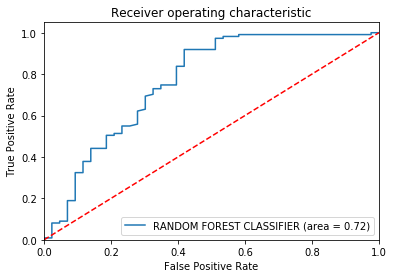

In [44]:

# ROC CURVE
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RANDOM FOREST CLASSIFIER (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

The AUC score is 72%  which means the model perform better.